### Exp-5: Fundamentals of Time-Series: Import .csv, time-series visualization, ACF/PACF, ADF test

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Time series:
    - series of data points or observations recorded at different or regular intervals of time
    - equally spaced time intervals
    - extract meaningful patterns and other characteristics of the data using statistical methods

- Examples:
    - Stock proces or weather patterns
    - line chart is generally used

- Components of TS:
    - Trend: general direction of the time series over a long period of time. Has to be expressed wrt to the entire time frame and not intervals of time.
    - Seasonality: trend repeats with respect to timing, direction and magnitude. Mostly annual
    - Cyclical component: no set repetition over a particular period of time. These cycles exhibit a seasonal variation but generally occcur over a time period
    
        - All cyclic components are not seasonal but a seasonal component is not always cyclic
    - Irregular variation: These are the fluctuations in the time series. are unpredictable, erratic and may or may not random
    - ETS Decomposition: Error Trend and Seasonality. A time Series can be decomposed into these three components

- Types of TS Data:
    - Time series data- at one point in time theres only one data point- one variable
    - Cross sectional data- at one point in time theres more than one data point- more than one variable
    - Pooled data- combo of time and cross sectional

- Terminology of TS:
    - Dependence: association of two observations of the same variable at prior time periods
        - also called auto correlation
    - Stationarity: mean value and variance of the series that remains constant over the time period
        - variance in mean is marginal then its stationarity
        - if values increase towards infinity then stationarity is not met
    - Differencing: used to make the series stationary and to control the auto-corrrelations.
        - once: first differencing
        - nth: nth differencing
        - similar to AP
        - trend of the time series is the result
        - only when time series is not stationarity

In [4]:
tsdata=np.loadtxt('D:\SEM 3\Python for Data Science\\tsdata.txt') # loads as a numpy array 

In [13]:
print(tsdata)

[[2.0040720e+07 2.3500000e-03]
 [2.0040721e+07 2.3300000e-03]
 [2.0040722e+07 2.3500000e-03]
 ...
 [2.0140917e+07 3.4500000e-03]
 [2.0140918e+07 3.3000000e-03]
 [2.0140919e+07 3.3100000e-03]]


In [14]:
tsdata.shape

(2624, 2)

In [10]:
df=pd.DataFrame(tsdata,columns=['Timestamp','Variable']) 

In [11]:
df

,Timestamp,Variable
0,20040720.0,0.00235
1,20040721.0,0.00233
2,20040722.0,0.00235
3,20040723.0,0.00242
4,20040726.0,0.00242
...,...,...
2619,20140915.0,0.00356
2620,20140916.0,0.00352
2621,20140917.0,0.00345
2622,20140918.0,0.00330


In [15]:
df.head()

,Timestamp,Variable
0,20040720.0,0.00235
1,20040721.0,0.00233
2,20040722.0,0.00235
3,20040723.0,0.00242
4,20040726.0,0.00242


In [16]:
df.tail()

,Timestamp,Variable
2619,20140915.0,0.00356
2620,20140916.0,0.00352
2621,20140917.0,0.00345
2622,20140918.0,0.00330
2623,20140919.0,0.00331


In [17]:
df.index=pd.to_datetime(df['Timestamp'],format="%Y%m%d")

In [18]:
df

,Timestamp,Variable
Timestamp,,
2004-07-20,20040720.0,0.00235
2004-07-21,20040721.0,0.00233
2004-07-22,20040722.0,0.00235
2004-07-23,20040723.0,0.00242
2004-07-26,20040726.0,0.00242
...,...,...
2014-09-15,20140915.0,0.00356
2014-09-16,20140916.0,0.00352
2014-09-17,20140917.0,0.00345


In [24]:
del df['Timestamp']

In [25]:
df

,Variable
Timestamp,
2004-07-20,0.00235
2004-07-21,0.00233
2004-07-22,0.00235
2004-07-23,0.00242
2004-07-26,0.00242
...,...
2014-09-15,0.00356
2014-09-16,0.00352
2014-09-17,0.00345


<Axes: xlabel='Timestamp'>

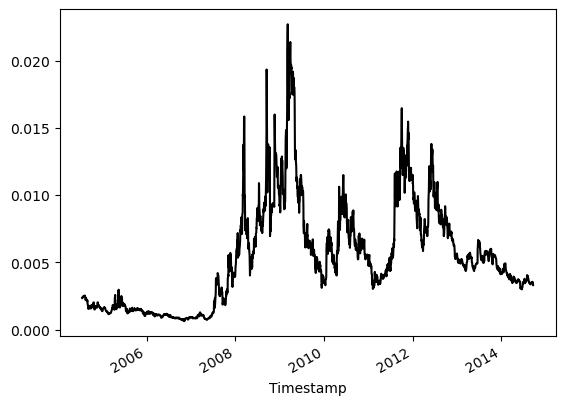

In [26]:
df['Variable'].plot(kind='line',color='black')

<Axes: ylabel='Frequency'>

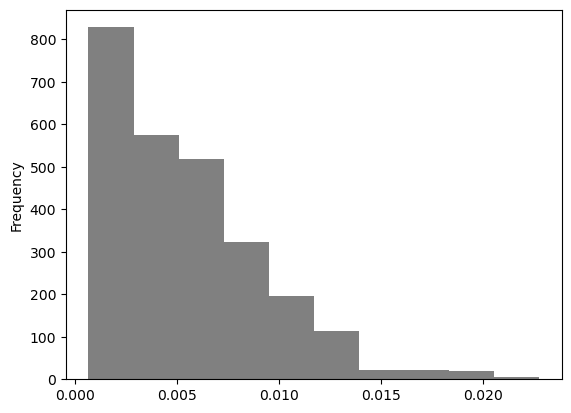

In [29]:
df['Variable'].plot(kind='hist',color='gray')

In [35]:
df['10DF']=df['Variable'].diff()

In [40]:
df

,Variable,10DF
Timestamp,,
2004-07-20,0.00235,NaN
2004-07-21,0.00233,-0.00002
2004-07-22,0.00235,0.00002
2004-07-23,0.00242,0.00007
2004-07-26,0.00242,0.00000
...,...,...
2014-09-15,0.00356,0.00007
2014-09-16,0.00352,-0.00004
2014-09-17,0.00345,-0.00007


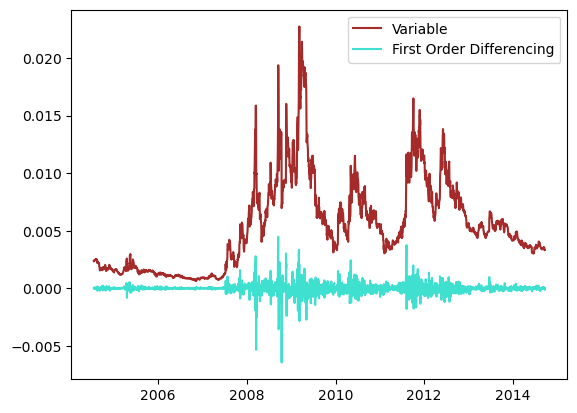

In [41]:
plt.plot(df.index,df['Variable'],color="brown")
plt.plot(df.index,df['10DF'],color="turquoise")
plt.legend(['Variable','First Order Differencing'])
plt.show()

In [42]:
df1=pd.read_csv('D:\SEM 3\Python for Data Science\yahoo_stock.csv')

In [43]:
df1

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [46]:
df1.index=df1['Date']

In [47]:
df1

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2015-11-23,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039


In [49]:
del df1['Date']

In [50]:
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039


<Axes: xlabel='Date'>

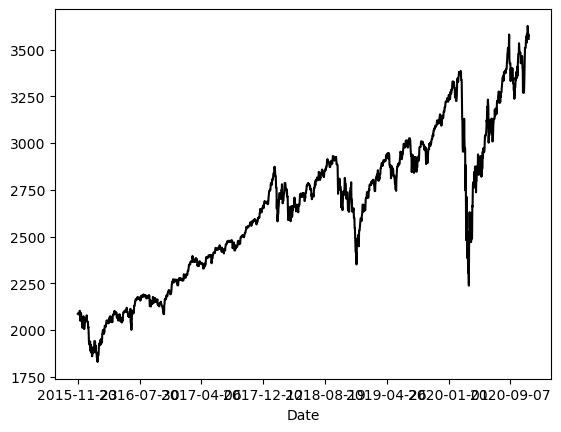

In [51]:
df1['Close'].plot(kind='line',color='black')

<Axes: ylabel='Frequency'>

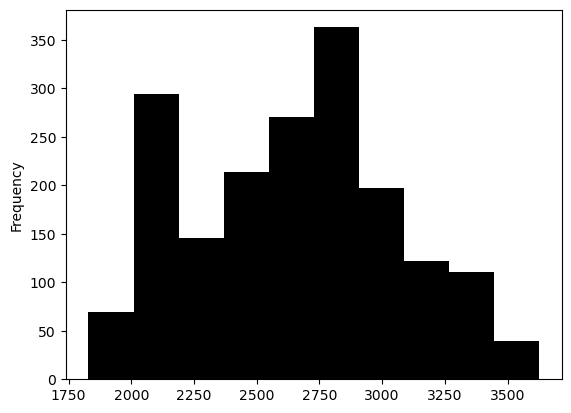

In [52]:
df1['Close'].plot(kind='hist',color='black')

In [54]:
df1['10DF']=df1['Close'].diff()

In [55]:
df1

,High,Low,Open,Close,Volume,Adj Close,10DF
Date,,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,NaN
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,2.549805
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,-0.269775
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,0.000000
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,1.239990
...,...,...,...,...,...,...,...
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912,41.760010
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029,-17.379883
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039,-41.739990


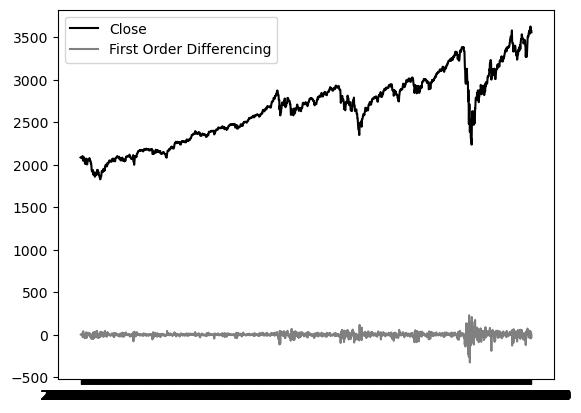

In [63]:
plt.plot(df1.index,df1['Close'],color="k")
plt.plot(df1.index,df1['10DF'],color="gray")
plt.legend(['Close','First Order Differencing'])
plt.show()